# TASK 1: UNDERSTAND THE PROBLEM STATEMENT

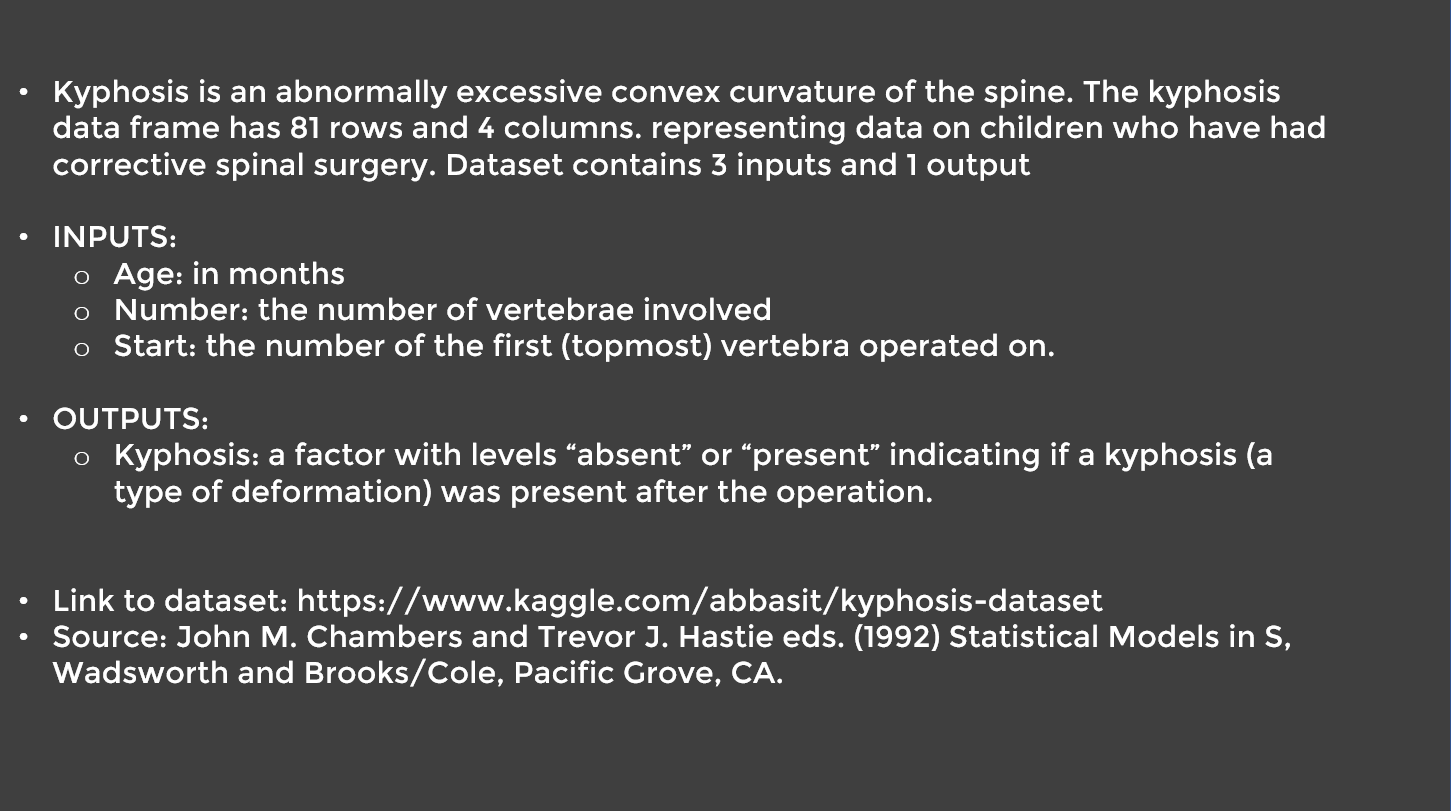

# TASK #2: IMPORT LIBRARIES AND DATASETS


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
kyphosis_df = pd.read_csv('kyphosis.csv')

In [3]:
kyphosis_df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [4]:
kyphosis_df.tail(5)

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [5]:
kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**
- **List the average, minimum and maximum age (in years) considered in this study using two different methods**

In [6]:
mean_age = kyphosis_df['Age'].mean()/12
max_age = kyphosis_df['Age'].max()/12
min_age = kyphosis_df['Age'].min()/12
print(mean_age)
print(max_age)
print(min_age)

6.97119341563786
17.166666666666668
0.08333333333333333


In [7]:
kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


# TASK #3: PERFORM DATA VISUALIZATION

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_y = LabelEncoder()
kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(kyphosis_df['Kyphosis'])

In [9]:
kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [10]:
kyphosis_True = kyphosis_df[kyphosis_df['Kyphosis']==1]

In [11]:
kyphosis_False = kyphosis_df[kyphosis_df['Kyphosis']==0]

In [12]:
print( 'Disease present after operation percentage =', (len(kyphosis_True) / len(kyphosis_df) )*100,"%")

Disease present after operation percentage = 20.98765432098765 %


<Axes: >

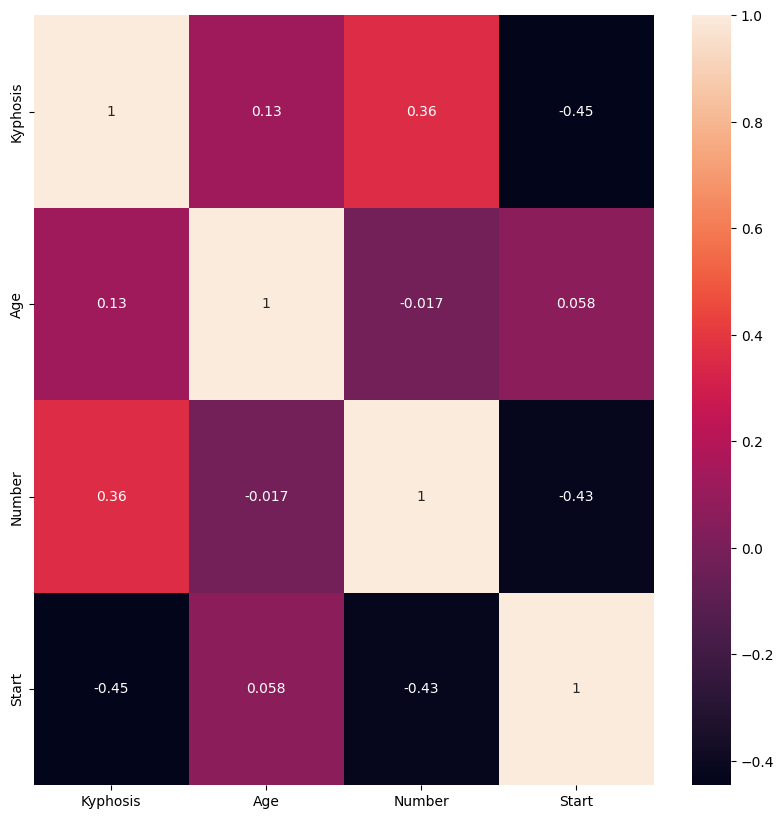

In [13]:
plt.figure(figsize=(10,10)) 
sns.heatmap(kyphosis_df.corr(), annot = True)

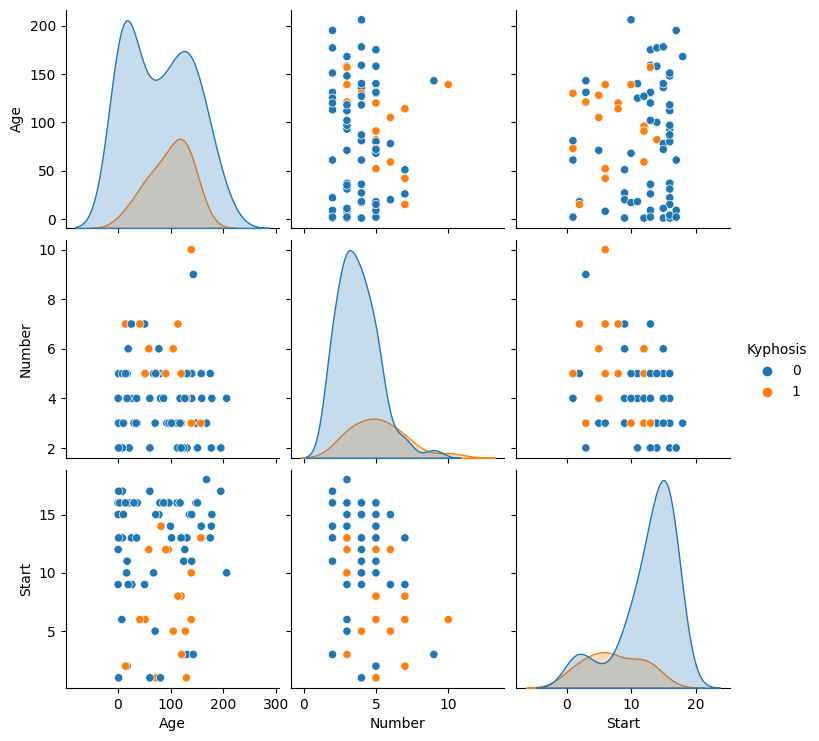

In [14]:
sns.pairplot(kyphosis_df, hue = 'Kyphosis')

<Axes: xlabel='Kyphosis', ylabel='count'>

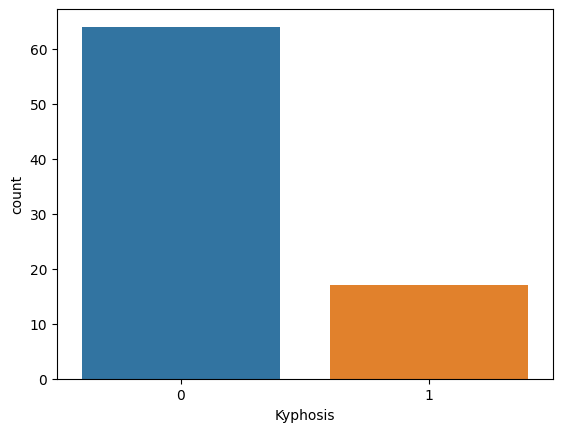

In [15]:
sns.countplot(x=kyphosis_df['Kyphosis'])

# TASK #4: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [16]:
# Let's drop the target label coloumns
X = kyphosis_df.drop(['Kyphosis'], axis = 1)

In [17]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [18]:
y =  kyphosis_df['Kyphosis']

In [19]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int32

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [22]:
X_train.shape

(64, 3)

In [23]:
X_test.shape

(17, 3)

In [24]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)


# TASK #5: TRAIN A LOGISTIC REGRESSION CLASSIFIER MODEL

In [25]:
X_train.shape

(64, 3)

In [26]:
y_train.shape

(64,)

In [27]:
X_test.shape

(17, 3)

In [28]:
y_test.shape

(17,)

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

# TASK #6: EVALUATE TRAINED MODEL PERFORMANCE 

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

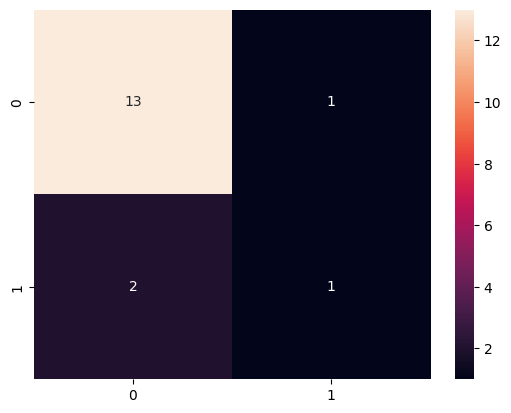

In [31]:
# Predicting the Test set results
y_predict_test = model.predict(X_test)
cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm, annot = True)

In [32]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.50      0.33      0.40         3

    accuracy                           0.82        17
   macro avg       0.68      0.63      0.65        17
weighted avg       0.80      0.82      0.81        17



# TASK #8: IMPROVE THE MODEL 

In [33]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

<Axes: >

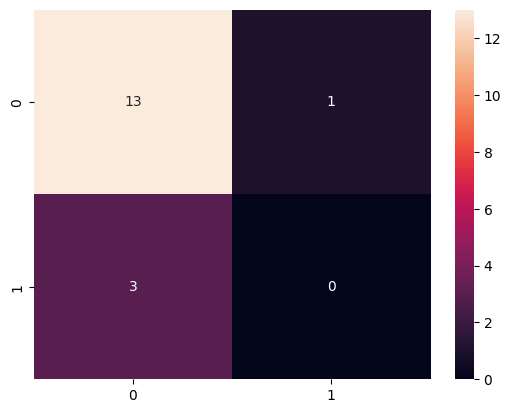

In [34]:
# Predicting the Test set results
y_predict_test = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [35]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.00      0.00      0.00         3

    accuracy                           0.76        17
   macro avg       0.41      0.46      0.43        17
weighted avg       0.67      0.76      0.71        17



In [36]:
feature_importances = pd.DataFrame(decision_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances)

        importance
Age       0.468215
Start     0.365943
Number    0.165841


In [37]:
from sklearn.ensemble import RandomForestClassifier
Random_Forest = RandomForestClassifier()
Random_Forest.fit(X_train,y_train)

RandomForestClassifier()

<Axes: >

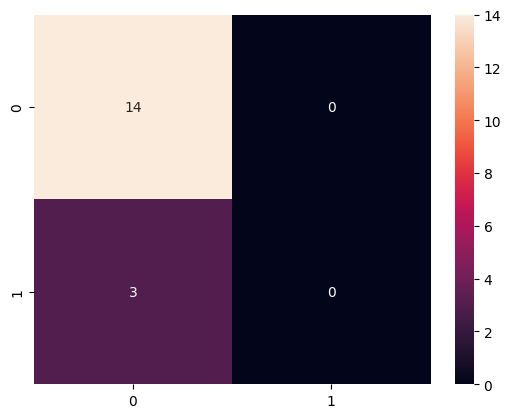

In [38]:
y_predict_test = Random_Forest.predict(X_test)
cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm, annot = True)

In [39]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       0.00      0.00      0.00         3

    accuracy                           0.82        17
   macro avg       0.41      0.50      0.45        17
weighted avg       0.68      0.82      0.74        17



c:\Users\talha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\talha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\talha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,